In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers, Sequential
import matplotlib.pyplot as plt

In [2]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory = "Cotton Plant Disease Dataset",
    shuffle = True,
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 1707 files belonging to 4 classes.


In [4]:
class_name = dataset.class_names
class_name

['Bacterial Blight', 'Curl Virus', 'Fussarium Wilt', 'Healthy']

In [5]:
n_class = len(class_name)
n_class

4

### Print Image of each batch

In [ ]:
plt.figure(figsize = (3,3))
for image_batch, label_batch in dataset.take(1):
  # It show tensor of images 
  print(image_batch[0])
  # It Show numpy array images
  print(image_batch[0].numpy())
  # it show shape of image
  print(image_batch[0].shape)
  # it show the different class value
  print("class number = ", label_batch[0].numpy())
  # It show the class name of the image
  print("class Name = ", class_name[label_batch[0]])
  # It show the specfic image
  plt.imshow(image_batch[0].numpy().astype('uint8'))
  plt.axis('off')

tf.Tensor(
[[[2.55000000e+02 2.55000000e+02 2.55000000e+02]
  [0.00000000e+00 9.43919983e+01 0.00000000e+00]
  [2.52381897e+00 1.08243744e+02 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]]

 [[2.55000000e+02 2.55000000e+02 2.55000000e+02]
  [0.00000000e+00 8.47982483e+01 0.00000000e+00]
  [1.95703125e+00 9.94418793e+01 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]]

 [[2.55000000e+02 2.55000000e+02 2.55000000e+02]
  [8.55560303e-02 8.00103760e+01 0.00000000e+00]
  [0.00000000e+00 9.09139709e+01 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]]

 ...

 [[2.55000000e+02 2.55000000e+02 2.55000000e+02]
  [5.75296326e+01 1.19487427

In [ ]:
plt.figure(figsize = (6,6))

for image_batch, label_batch in dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_name[label_batch[i]])
    plt.axis('off')

### Divide the Dataset into Train, Test, Valid

In [7]:
# The size of train dataset is 80%
# The size of test dataset is 10%
# The size of valid dataset is 10%

train_datasize = int(0.8*len(dataset))
test_datasize = int(0.1*len(dataset))
valid_datasize = int(0.1*len(dataset))

train_datasize, test_datasize, valid_datasize

(43, 5, 5)

In [8]:
Train_dataset = dataset.take(train_datasize)
Test_dataset = dataset.skip(train_datasize).take(test_datasize)
Valid_dataset = dataset.skip(train_datasize+test_datasize)
print(f"Train Dataset lenght = {len(Train_dataset)}\nTest Dataset lenght = {len(Test_dataset)}\nValid Dataset lenght = {len(Valid_dataset)}")

Train Dataset lenght = 43
Test Dataset lenght = 5
Valid Dataset lenght = 6


### Through a function we also splite the Dataset

In [9]:
def split_dataset(dataset, train_size, test_size, valid_size, shuffle = True, shuffle_size = 10000):
  dataset_size = len(dataset)

  if shuffle:
    dataset = dataset.shuffle(shuffle_size, seed = 15)

  train_datasize = int(train_size*dataset_size)
  test_datasize = int(test_size*dataset_size)
  valid_datasize = int(valid_size*dataset_size)

  Train_dataset = dataset.take(train_datasize)
  Test_dataset = dataset.skip(train_datasize).take(test_datasize)
  Valid_dataset = dataset.skip(train_datasize+test_datasize)

  return Train_dataset, Test_dataset, Valid_dataset

In [10]:
Train_dataset, Test_dataset, Valid_dataset = split_dataset(dataset, 0.8, 0.1, 0.1)
print(f"Train Dataset lenght = {len(Train_dataset)}\nTest Dataset lenght = {len(Test_dataset)}\nValid Dataset lenght = {len(Valid_dataset)}")

Train Dataset lenght = 43
Test Dataset lenght = 5
Valid Dataset lenght = 6


### Preprocessing

In [11]:
Train_dataset = Train_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
Test_dataset = Test_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
Valid_dataset = Valid_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [12]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [13]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

### Resnet50 Model

In [11]:
Resnet50 = tf.keras.applications.ResNet50(
    include_top = False,
    weights="imagenet",
    input_shape = (256,256,3),
    classes = 4
)

In [12]:
Resnet_Model = Sequential()
Resnet50.trainable = False

Resnet_Model.add(Resnet50)
Resnet_Model.add(layers.Flatten())
Resnet_Model.add(layers.Dense(512, activation = 'relu'))
Resnet_Model.add(layers.Dense(4, activation = 'softmax'))


In [13]:
Resnet_Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 8, 8, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               67109376  
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 2052      
Total params: 90,699,140
Trainable params: 67,111,428
Non-trainable params: 23,587,712
_________________________________________________________________


In [14]:
Resnet_Model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [15]:
Resnet50_history = Resnet_Model.fit(
    Train_dataset,
    epochs = 4,
    validation_data = Valid_dataset
)

Epoch 1/4
43/43 [==============================] - 176s 4s/step - loss: 12.9840 - accuracy: 0.8074 - val_loss: 0.2345 - val_accuracy: 0.9896
Epoch 2/4
43/43 [==============================] - 163s 4s/step - loss: 0.3094 - accuracy: 0.9804 - val_loss: 0.0498 - val_accuracy: 0.9896
Epoch 3/4
43/43 [==============================] - 152s 3s/step - loss: 0.1162 - accuracy: 0.9948 - val_loss: 4.2938e-04 - val_accuracy: 1.0000
Epoch 4/4
43/43 [==============================] - 169s 4s/step - loss: 0.0532 - accuracy: 0.9956 - val_loss: 0.0278 - val_accuracy: 0.9942


In [16]:
Resnet50_Score = Resnet_Model.evaluate(Test_dataset)
Resnet50_Score

5/5 [==============================] - 17s 3s/step - loss: 0.0870 - accuracy: 0.9875


[0.0870383232831955, 0.987500011920929]

### VGG16 Model

In [26]:
VGG16 = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(256,256,3)
)

In [27]:
VGG16_Model = Sequential()
VGG16.trainable = False

VGG16_Model.add(VGG16)
VGG16_Model.add(layers.Flatten())
VGG16_Model.add(layers.Dense(512, activation = 'relu'))
VGG16_Model.add(layers.Dense(4, activation = 'softmax'))

In [28]:
VGG16_Model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               16777728  
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 2052      
Total params: 31,494,468
Trainable params: 16,779,780
Non-trainable params: 14,714,688
_________________________________________________________________


In [29]:
VGG16_Model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [30]:
VGG16_history = VGG16_Model.fit(
    Train_dataset,
    epochs = 4,
    validation_data = Valid_dataset
)

Epoch 1/4
43/43 [==============================] - 650s 15s/step - loss: 9.9458 - accuracy: 0.8170 - val_loss: 0.0786 - val_accuracy: 0.9942
Epoch 2/4
43/43 [==============================] - 614s 14s/step - loss: 0.2021 - accuracy: 0.9838 - val_loss: 0.0826 - val_accuracy: 0.9825
Epoch 3/4
43/43 [==============================] - 597s 14s/step - loss: 0.0759 - accuracy: 0.9919 - val_loss: 0.2390 - val_accuracy: 0.9766
Epoch 4/4
43/43 [==============================] - 777s 18s/step - loss: 0.0469 - accuracy: 0.9956 - val_loss: 0.2302 - val_accuracy: 0.9825


In [38]:
VGG16_Score = VGG16_Model.evaluate(Test_dataset)
VGG16_Score

5/5 [==============================] - 70s 14s/step - loss: 0.3428 - accuracy: 0.9875


[0.34280914068222046, 0.987500011920929]

### Xception 

In [31]:
Xception = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(256,256,3)
)

83697664/83683744 [==============================] - 1303s 16us/step


In [34]:
Xception_Model = Sequential()
Xception.trainable = False

Xception_Model.add(Xception)
Xception_Model.add(layers.Flatten())
Xception_Model.add(layers.Dense(512, activation = "relu"))
Xception_Model.add(layers.Dense(4, activation = "softmax"))


In [35]:
Xception_Model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 8, 8, 2048)        20861480  
_________________________________________________________________
flatten_2 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               67109376  
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 2052      
Total params: 87,972,908
Trainable params: 67,111,428
Non-trainable params: 20,861,480
_________________________________________________________________


In [36]:
Xception_Model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [37]:
Xception_Model_history = VGG16_Model.fit(
    Train_dataset,
    epochs = 4,
    validation_data = Valid_dataset
)

Epoch 1/4
43/43 [==============================] - 662s 15s/step - loss: 0.0469 - accuracy: 0.9926 - val_loss: 0.4551 - val_accuracy: 0.9825
Epoch 2/4
43/43 [==============================] - 626s 15s/step - loss: 0.3164 - accuracy: 0.9867 - val_loss: 0.5010 - val_accuracy: 0.9942
Epoch 3/4
43/43 [==============================] - 616s 14s/step - loss: 0.0244 - accuracy: 0.9985 - val_loss: 0.5877 - val_accuracy: 0.9883
Epoch 4/4
43/43 [==============================] - 689s 16s/step - loss: 0.0325 - accuracy: 0.9970 - val_loss: 0.8113 - val_accuracy: 0.9942


In [40]:
Xception_Score = Xception_Model.evaluate(Test_dataset)
Xception_Score

5/5 [==============================] - 24s 5s/step - loss: 13.8336 - accuracy: 0.2313


[13.833582878112793, 0.23125000298023224]

### InceptionV3

In [10]:
InceptionV3 = tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(256,256,3)
)

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of bcbd6486424b2319ff4ef7d526e38f63 so we will re-download the data.
87924736/87910968 [==============================] - 510s 6us/step


In [11]:
InceptionV3_Model = Sequential()
InceptionV3.trainable = False

InceptionV3_Model.add(InceptionV3)
InceptionV3_Model.add(layers.Flatten())
InceptionV3_Model.add(layers.Dense(512, activation = "relu"))
InceptionV3_Model.add(layers.Dense(4, activation = "softmax"))


In [13]:
InceptionV3_Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 6, 6, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 73728)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               37749248  
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 2052      
Total params: 59,554,084
Trainable params: 37,751,300
Non-trainable params: 21,802,784
_________________________________________________________________


In [15]:
InceptionV3_Model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [16]:
InceptionV3_Model_history = InceptionV3_Model.fit(
    Train_dataset,
    epochs = 4,
    validation_data = Valid_dataset
)

Epoch 1/4
43/43 [==============================] - 119s 3s/step - loss: 296.0261 - accuracy: 0.5160 - val_loss: 183.7151 - val_accuracy: 0.5521
Epoch 2/4
43/43 [==============================] - 107s 2s/step - loss: 80.9226 - accuracy: 0.7129 - val_loss: 40.2923 - val_accuracy: 0.8490
Epoch 3/4
43/43 [==============================] - 102s 2s/step - loss: 67.9309 - accuracy: 0.7528 - val_loss: 16.9933 - val_accuracy: 0.8906
Epoch 4/4
43/43 [==============================] - 335s 8s/step - loss: 29.1202 - accuracy: 0.8365 - val_loss: 44.1854 - val_accuracy: 0.7836


In [18]:
InceptionV3_Model_Score = InceptionV3_Model.evaluate(Test_dataset)
InceptionV3_Model_Score

5/5 [==============================] - 10s 1s/step - loss: 46.2853 - accuracy: 0.7875


[46.28532409667969, 0.7875000238418579]

### Visualize The Loss and Accuracy of Train and valid data

In [ ]:
import seaborn as sb

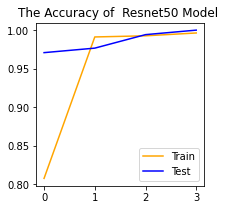

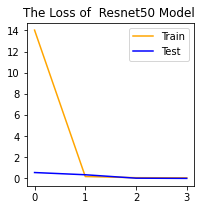

In [57]:
plt.figure(figsize = (3,3))
plt.plot(range(4),Resnet50_history.history['accuracy'], color = 'orange', label = 'Train')
plt.plot(range(4),Resnet50_history.history['val_accuracy'], color = 'blue', label = 'Test')
plt.title('The Accuracy of  Resnet50 Model ')
plt.legend()
plt.show()
plt.figure(figsize = (3,3))
plt.plot(range(4),Resnet50_history.history['loss'], color = 'orange', label = 'Train')
plt.plot(range(4),Resnet50_history.history['val_loss'], color = 'blue', label = 'Test')
plt.title('The Loss of  Resnet50 Model ')
plt.legend()
plt.show()

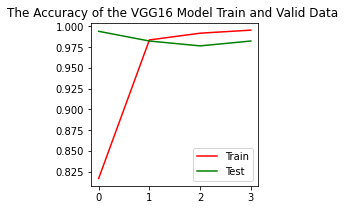

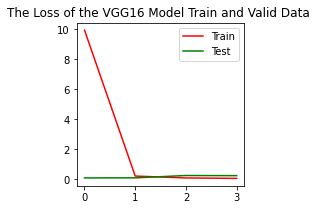

In [58]:
plt.figure(figsize = (3,3))
plt.plot(range(4),VGG16_history.history['accuracy'], color = 'red', label = 'Train')
plt.plot(range(4),VGG16_history.history['val_accuracy'], color = 'green', label = 'Test')
plt.title('The Accuracy of the VGG16 Model Train and Valid Data ')
plt.legend()
plt.show()
plt.figure(figsize = (3,3))
plt.plot(range(4),VGG16_history.history['loss'], color = 'red', label = 'Train')
plt.plot(range(4),VGG16_history.history['val_loss'], color = 'green', label = 'Test')
plt.title('The Loss of the VGG16 Model Train and Valid Data ')
plt.legend()
plt.show()

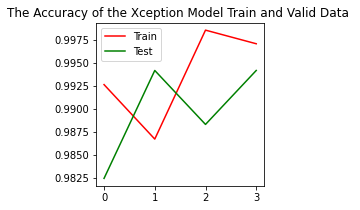

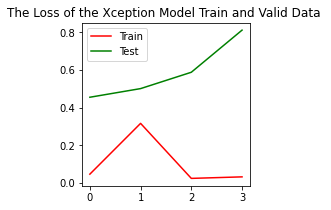

In [59]:
plt.figure(figsize = (3,3))
plt.plot(range(4),Xception_Model_history.history['accuracy'], color = 'red', label = 'Train')
plt.plot(range(4),Xception_Model_history.history['val_accuracy'], color = 'green', label = 'Test')
plt.title('The Accuracy of the Xception Model Train and Valid Data ')
plt.legend()
plt.show()
plt.figure(figsize = (3,3))
plt.plot(range(4),Xception_Model_history.history['loss'], color = 'red', label = 'Train')
plt.plot(range(4),Xception_Model_history.history['val_loss'], color = 'green', label = 'Test')
plt.title('The Loss of the Xception Model Train and Valid Data ')
plt.legend()
plt.show()

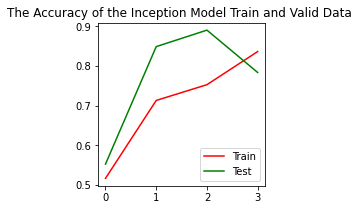

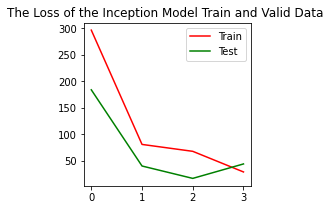

In [19]:
plt.figure(figsize = (3,3))
plt.plot(range(4),InceptionV3_Model_history.history['accuracy'], color = 'red', label = 'Train')
plt.plot(range(4),InceptionV3_Model_history.history['val_accuracy'], color = 'green', label = 'Test')
plt.title('The Accuracy of the Inception Model Train and Valid Data ')
plt.legend()
plt.show()
plt.figure(figsize = (3,3))
plt.plot(range(4),InceptionV3_Model_history.history['loss'], color = 'red', label = 'Train')
plt.plot(range(4),InceptionV3_Model_history.history['val_loss'], color = 'green', label = 'Test')
plt.title('The Loss of the Inception Model Train and Valid Data ')
plt.legend()
plt.show()